# Authors
# ----------------------------------------

## Kiara Gabriel             -    2161334

## Phola Bavuma          -    1848739

## Shravan Singh         -    2173638

## Arneev Singh          -    2180393

# ----------------------------------------

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
#Constants
tabSpace = 30

In [4]:
#Helper Function - Prints Question
def printQues(questionNumber):
    ans = "Question (" + questionNumber + ")"
    
    hashes = ""
    for i in range(len(ans)):
        hashes += '='
    
    print(ans)
    print(hashes)

In [5]:
#Sigmoid Function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [6]:
#Dot Product
def myDot(inputVec,thetaMat):
    ansLst = []
    
    for thetaLst in thetaMat:
        isum = 0
        
        for i in range(len(thetaLst)):
            isum += thetaLst[i] * inputVec[i]
        
        ansLst.append(isum)
        
    return ansLst
    

In [7]:
class Node:
    def __init__(self):
        self.value = 1
        self.weights = []
    
    def setValue(self, value):
        self.value = value
    
    def addWeight(self, weight):
        self.weights.append(weight)
        
    def getWeight(self, index):
        return self.weights[index]

In [8]:
class Layer:
    def __init__(self, size):
        self.nodes = []
        
        for i in range(size):
            self.nodes.append(Node())
            
    def __str__(self):
        lst = []
        
        for i in range(self.getSize()):
            lst.append(self.nodes[i].value)
            
        return str(lst)
        
    def getSize(self):
        return len(self.nodes)
        
    def setNodeValue(self, index, value):
        self.nodes[index].setValue(value)
    
    def addNodeWeight(self, index, weight):
        self.nodes[index].addWeight(weight)
    
    def addNode(self, node):
        self.nodes.append(node)
        
    def updateNode(self, index, value):
        self.nodes[index].value = value
    
    def getNodeValue(self,index):
        return self.nodes[index].value
    
    def getNodeWeights(self, index):
        return self.nodes[index].weights
    
    def getNodesValue(self):
        lst = []
        for node in self.nodes:
            lst.append(node.value)
        
        return lst
    
    def getNodesWeight(self, weightIndex):
        lst = []
        for node in self.nodes:
            lst.append(node.weights[weightIndex])
            
        return lst
    
    def getAmountWeightPerNode(self):
        return len(self.nodes[0].weights)

In [9]:
class NeuralNetwork:
    def __init__(self, nodeLst):
        
        self.nodeLst = nodeLst
        self.layers = []
        
        for numberNodes in nodeLst:
            self.layers.append(Layer(numberNodes))
            
        
        self.amountLayers = len(nodeLst)
    
    def setInputLayer(self, inputValues):
        
        #Making sure they fit
        if (len(inputValues) != self.layers[0].getSize() - 1):
            print("Input Values cannot fit into Input Layer")
            print("Input Values is:")
            print(inputValues)
            print("Input Layer is:")
            print(self.layers[0])
            print("Remember there is no input value for the first(bias) node")
            return
        
        self.inputValues = inputValues
        
        #Setting Bias Node = 1
        self.layers[0].setNodeValue(0,1)
        
        #Setting Other Nodes to Input Values
        for i in range(len(inputValues)):
            self.layers[0].setNodeValue(i+1,inputValues[i])
            
    
    def printNetwork(self,showWeights=False):
        
        #get maxAmountNodes of layers
        maxAmountNodes = 0  
        for layer in self.layers:
            size = layer.getSize()
            if (size > maxAmountNodes):
                maxAmountNodes = size
        
        #Add empty list for maxAmountNodes
        valueLst = []
        weightsLst = []
        for i in range(maxAmountNodes):
            valueLst.append([])
            weightsLst.append([])
        
        #Adding all nodes to layerLst
        for i in range(len(self.layers)):
            for j in range(self.layers[i].getSize()):
                valueLst[j].append(self.layers[i].getNodeValue(j))
                weightsLst[j].append(self.layers[i].getNodeWeights(j))
                
                
        #Printing out layerLst
        for row in valueLst:
            sLine = ""
            for val in row:
                sLine += str(val) + '\t'
            
            print(sLine)
            
        if (showWeights):
            print()
            for row in weightsLst:
                sLine = ""
                for val in row:
                    sLine += str(val) + '\t'

                print(sLine.expandtabs(tabSpace))
            
        
            
        
    def setWeights(self, weights):
        self.weights = weights
        #For each layer in weight
        for layerIndex in range(len(weights)):
            thetaMat = weights[layerIndex]
            
            #For each thetaLst in thetaMat (this is for one layer)
            for thetaLst in thetaMat:
                for nodeIndex in range(len(thetaLst)):
                    self.layers[layerIndex].addNodeWeight(nodeIndex, thetaLst[nodeIndex])
        

    def setActivationFunction(self, activationFunction):
        self.activationFunction = activationFunction
        
    def forwardPropogation(self):
        #For each layer
        for layerIndex in range(len(self.layers)):
            #If last layer then continue
            if (layerIndex == len(self.layers) - 1):
                continue
                
            layer = self.layers[layerIndex]
            nextLayer = self.layers[layerIndex + 1]
            
            nodeVals = layer.getNodesValue()
            nodeWeights = self.weights[layerIndex]

            dotProduct = myDot(nodeVals,nodeWeights)
            
            if (type(dotProduct) == float):
                nextLayer.setNodeValue(1,self.activationFunction(dotProduct))
                return
            
            for i in range(len(dotProduct)):
                if (layerIndex == len(self.layers) -2):
                    nextLayer.setNodeValue(i,self.activationFunction(dotProduct[i]))
                    return
                
                nextLayer.setNodeValue(i+1,self.activationFunction(dotProduct[i]))
                
    def getOutput(self):
        return self.activationFunction(self.layers[len(self.layers)-1].getNodeValue(0))
            
    def resetNetwork(self):
        for layer in self.layers:
            for node in layer.nodes:
                node.value = 1
                node.weights = []

In [10]:
#Helper Print Neural Network

def printNeuralWithHelper(inputVec, neuralNetwork, questionNumber, func, theta):
    neuralNetwork.setInputLayer(inputVec)
    
    printQues(questionNumber)

    neuralNetwork.setWeights(theta)
    neuralNetwork.setActivationFunction(func)

    print("Before Forward Propogation")
    neuralNetwork.printNetwork(False)
    print()

    neuralNetwork.forwardPropogation()

    print("Forward Propogation")
    neuralNetwork.printNetwork(False)
    print()

    print("Output")
    print(neuralNetwork.getOutput())



In [11]:
#Question 1
amountNodeLst = [4,3,1]
q1NN = NeuralNetwork(amountNodeLst)

thetaMat = [
    [
        [1,-1,0.5,1]
        ,
        [2,-2,1,-1]
    ]
    ,
    [
        [-1,2,1]
    ]
]

In [12]:
inputVal1 = [0,-3,1]

printNeuralWithHelper(inputVal1, q1NN, "1a",sigmoid, thetaMat)

Question (1a)
Before Forward Propogation
1	1	1	
0	1	
-3	1	
1	

Forward Propogation
1	1	0.5900377859962891	
0	0.6224593312018546	
-3	0.11920292202211755	
1	

Output
0.6433738155095761


In [13]:
inputVal2 = [1,2,1]

printNeuralWithHelper(inputVal2, q1NN, "1b",sigmoid, thetaMat)


Question (1b)
Before Forward Propogation
1	1	0.5900377859962891	
1	0.6224593312018546	
2	0.11920292202211755	
1	

Forward Propogation
1	1	0.8164760997195802	
1	0.8807970779778823	
2	0.7310585786300049	
1	

Output
0.693487802310551


In [14]:
inputVal3 = [-1,1,2]

printNeuralWithHelper(inputVal3, q1NN, "1c",sigmoid, thetaMat)

Question (1c)
Before Forward Propogation
1	1	0.8164760997195802	
-1	0.8807970779778823	
1	0.7310585786300049	
2	

Forward Propogation
1	1	0.8733158426540304	
-1	0.9890130573694068	
1	0.9525741268224334	
2	

Output
0.705435187153017


## Question 2(a)

In [15]:
#Question 2(a)

def f(x):
    y = (x**2)*(math.sin(2*math.pi*x))+0.7
    return y

## Question 2(b) & 2(c)

<function matplotlib.pyplot.show(close=None, block=None)>

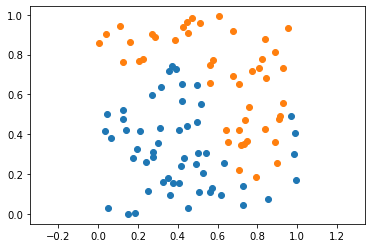

In [16]:
#Question 2(b) and 2(c)

dataset = np.random.uniform(0,1,size=(100,2))
classes = np.zeros(100)
class0_points_x = []
class0_points_y = []
class0 = [class0_points_x,class0_points_y]

class1_points_x = []
class1_points_y = []
class1 = [class1_points_x,class1_points_y]

for i in range(100):
    if(f(dataset[i][0])>dataset[i][1]):
        classes[i] = 0
        class0_points_x.append(dataset[i][0])
        class0_points_y.append(dataset[i][1])
    else:
        classes[i] = 1
        class1_points_x.append(dataset[i][0])
        class1_points_y.append(dataset[i][1])

plt.scatter(class0_points_x,class0_points_y)
plt.scatter(class1_points_x,class1_points_y)
plt.axis('equal')
plt.show

